### ITAD-315 Discrete Math - Fall 2025
## Lesson 7
### Activity 3: Product Rule

**Objective:** This activity will help you with iterating on lists in Python.

Assuming we have three categorizations on animals (as listed in the cell below), based on their type, habitat and diet, and that all the combinations are allowed, calculate the number of possible categories and list all of them.

In [1]:
types = ["bird", "mammal", "reptile", "insect"]
habitats = ["water", "earth"]
diets = ["herbs", "meat"]

In [2]:
combination_count = 0
all_life_forms = []

print("--- Combinations generated by Nested Loops ---")
for creature_type in types:
    for habitat in habitats:
        for diet in diets:
            # Create the combination
            life_form = (creature_type, habitat, diet)
            
            # Store and print the combination
            all_life_forms.append(life_form)
            print(f"({creature_type}, {habitat}, {diet})")
            
            # Increment the counter
            combination_count += 1

print("-" * 44)
print(f"Total combinations (Product Rule): {len(types)} * {len(habitats)} * {len(diets)}")
print(f"Total combinations (Calculated): {combination_count}")

--- Combinations generated by Nested Loops ---
(bird, water, herbs)
(bird, water, meat)
(bird, earth, herbs)
(bird, earth, meat)
(mammal, water, herbs)
(mammal, water, meat)
(mammal, earth, herbs)
(mammal, earth, meat)
(reptile, water, herbs)
(reptile, water, meat)
(reptile, earth, herbs)
(reptile, earth, meat)
(insect, water, herbs)
(insect, water, meat)
(insect, earth, herbs)
(insect, earth, meat)
--------------------------------------------
Total combinations (Product Rule): 4 * 2 * 2
Total combinations (Calculated): 16


### Using the itertools library

Let's now use the `itertools` library to create the list, in a much simpler way.

In [3]:
import itertools

all_combinations = list(itertools.product(types, habitats, diets))

print("\n--- Combinations generated by itertools.product ---")
for i, combination in enumerate(all_combinations):
    # 'combination' is a tuple, e.g., ('bird', 'water', 'herbs')
    print(f"{i+1}: {combination}")

print("-" * 52)
print(f"Total combinations found by itertools: {len(all_combinations)}")


--- Combinations generated by itertools.product ---
1: ('bird', 'water', 'herbs')
2: ('bird', 'water', 'meat')
3: ('bird', 'earth', 'herbs')
4: ('bird', 'earth', 'meat')
5: ('mammal', 'water', 'herbs')
6: ('mammal', 'water', 'meat')
7: ('mammal', 'earth', 'herbs')
8: ('mammal', 'earth', 'meat')
9: ('reptile', 'water', 'herbs')
10: ('reptile', 'water', 'meat')
11: ('reptile', 'earth', 'herbs')
12: ('reptile', 'earth', 'meat')
13: ('insect', 'water', 'herbs')
14: ('insect', 'water', 'meat')
15: ('insect', 'earth', 'herbs')
16: ('insect', 'earth', 'meat')
----------------------------------------------------
Total combinations found by itertools: 16


### Activity 4: Sampling

**Objective:** Working with combinations, and introducing the notion of probability.

A population consists of 100 boars: 50 female and 50 male. If a hunter randomly selects 20 boars from this population without replacement, what is the probability that exactly 10 are female and 10 are male?

In [4]:
import math

n_total = 100
n_female = 50
n_male = 50
k_total = 20
k_female = 10
k_male = 10

all_combinations = math.comb(n_total, k_total)
favoravle_combinations = math.comb(n_female, k_female) * math.comb(n_male, k_male)

print(f"Favorable combinations: {favoravle_combinations:,}\nTotal combinations: {all_combinations:,}\nRatio (probability): {favoravle_combinations/all_combinations:.6f}")

Favorable combinations: 105,519,698,801,858,548,900
Total combinations: 535,983,370,403,809,682,970
Ratio (probability): 0.196871


### Same question, via simulation

Now let's solve the same problem using Monte Carlo simulation.

**Objective:** Working with simulation is a way to validate if our analytic solution is accurate.

In [5]:
import random
from collections import Counter

POPULATION_SIZE = 100
FEMALE_BOARS = 50
MALE_BOARS = 50
SAMPLE_SIZE = 20
NUM_SIMULATIONS = 100000  # Number of hunting trips to simulate (higher = more accurate)

population = ['F'] * FEMALE_BOARS + ['M'] * MALE_BOARS

def simulate_hunt():
    sample = random.sample(population, SAMPLE_SIZE)
    counts = Counter(sample)
    return counts['F']

print(f"Population: {POPULATION_SIZE} boars (50 F, 50 M)")
print(f"Sample Size: {SAMPLE_SIZE} boars")
print(f"Number of Simulations: {NUM_SIMULATIONS:,}\n")

results = []
for _ in range(NUM_SIMULATIONS):
    results.append(simulate_hunt())

TARGET_FEMALES = 10
target_hits = results.count(TARGET_FEMALES)

estimated_probability = target_hits / NUM_SIMULATIONS

print(f"Target Scenario: Exactly {TARGET_FEMALES} female boars (and 10 male)")
print(f"Occurrences of Target Scenario: {target_hits:,} times")
print(f"Estimated Probability (Simulation): {estimated_probability:.4f}")

distribution_counts = Counter(results)

Population: 100 boars (50 F, 50 M)
Sample Size: 20 boars
Number of Simulations: 100,000

Target Scenario: Exactly 10 female boars (and 10 male)
Occurrences of Target Scenario: 19,602 times
Estimated Probability (Simulation): 0.1960


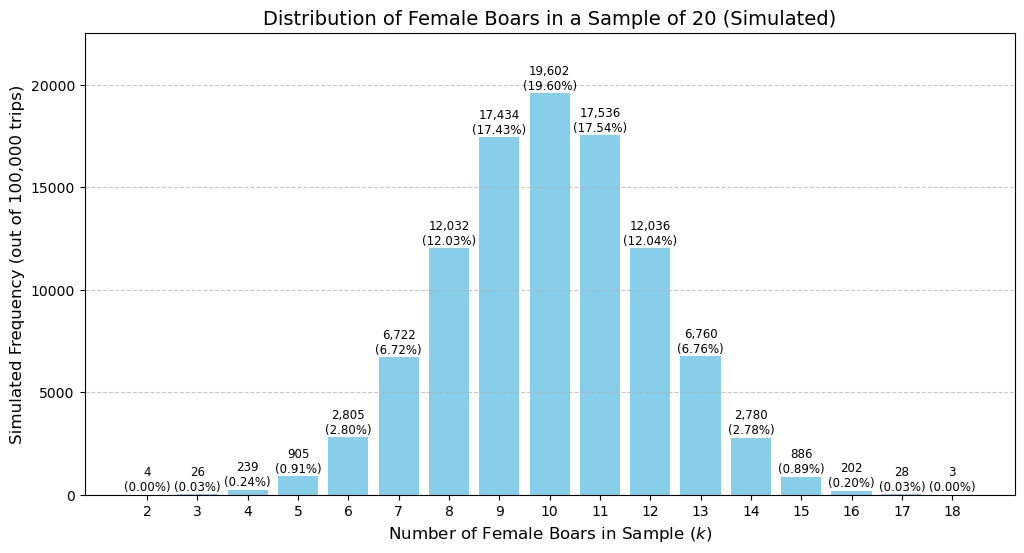

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(distribution_counts.items(), columns=['Number of Females', 'Count'])
df['Percentage'] = df.Count/NUM_SIMULATIONS * 100

plt.figure(figsize=(12, 6))
bars = plt.bar(df['Number of Females'], df['Count'], color='skyblue')

# Add titles and labels
plt.title('Distribution of Female Boars in a Sample of 20 (Simulated)', fontsize=14)
plt.xlabel('Number of Female Boars in Sample ($k$)', fontsize=12)
plt.ylabel(f'Simulated Frequency (out of {NUM_SIMULATIONS:,} trips)', fontsize=12)
plt.xticks(df['Number of Females'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar, count, percent in zip(bars, df['Count'], df['Percentage']):
    # Format the text with comma separator for count
    text = f'{count:,}\n({percent:.2f}%)'

    # Get the height of the bar to position the text
    height = bar.get_height()

    # Place the text slightly above the bar
    plt.text(
        bar.get_x() + bar.get_width() / 2, # x-coordinate: center of the bar
        height + 50, # y-coordinate: slightly above the bar
        text,
        ha='center',
        va='bottom',
        fontsize=8.5
    )

# Adjust y-axis limit to ensure the labels are not cut off
plt.ylim(0, df['Count'].max() * 1.15);

# Assignment: Quality Control Inspection and Counting Outcomes

**Objective:** To understand and apply combinatorial counting principles (combinations) for sampling without replacement, and to use Python for simulating and analyzing these counted outcomes, and visualizing the results.

### **Scenario:** Quality Control in Manufacturing

<img src="https://cdn.wellpcb.com/wp-content/uploads/Tools-used-in-visual-inspection-1024x683.jpg?lossy=1&ssl=1" width="600" alt="Well PCB">

A component manufacturer needs to perform a final quality control inspection on a large batch of components before shipping.

The total batch size is $N = 200$ electronic components.

Through previous testing, the quality team has identified that the batch contains a known population of defective components (due to a soldering issue), totalling $K = 40$ components.

A quality control inspector selects a random sample of $n = 30$ components from the batch without replacement for the final check.

## Task 1: Combinatorial Counting (Analytical Solution) <span style="color: red;">(3 Points)

1. **Define Parameters:** State the values for $N$ (Total batch size), $K$ (Number of known defective components), and $n$ (Sample size).
2. **Total Outcomes (Denominator):** Calculate the total number of unique ways the inspector can select a sample of $30$ components from the entire batch of $200$. Show the combinatorial expression (e.g., $\binom{a}{b}$).
3. **Specific Outcomes (Numerator):** Calculate the number of ways the researcher can select a sample that contains the following:
    - **Exactly 4 Defective Components:** Determine the number of ways to select exactly $4$ defective components AND the remaining components from the non-defective population. Show your combinatorial expression.
    - **Exactly 6 Defective Components:** Determine the number of ways to select exactly $6$ defective components AND the remaining components from the non-defective population. Show your combinatorial expression.
    - **Minimum Outcomes:** Calculate the number of ways the researcher could select a sample with zero defective components ($k=0$). Show your combinatorial expression.

In [7]:
from math import comb

# Parameters
N = 200        # Total components
n = 30         # Sample size
K = 50         # Example: number of defective components (change as needed)

# 1. Total number of samples
total_outcomes = comb(N, n)

# 2. Exactly 4 defective
exact_4 = comb(K, 4) * comb(N - K, n - 4)

# 3. Exactly 6 defective
exact_6 = comb(K, 6) * comb(N - K, n - 6)

# 4. Zero defective
zero_defective = comb(K, 0) * comb(N - K, n)

print("Total outcomes (C(200,30)):", total_outcomes)
print("Ways to get exactly 4 defective:", exact_4)
print("Ways to get exactly 6 defective:", exact_6)
print("Ways to get zero defective:", zero_defective)


Total outcomes (C(200,30)): 409681705022127773530866523638950880
Ways to get exactly 4 defective: 21662195812969422336875498604600000
Ways to get exactly 6 defective: 61685681410265307416435943645480000
Ways to get zero defective: 32198785340494567031466236484400


# Task: Part 2: Computational Simulation (Python) <span style="color: red;">(3 Points)</span>

You will now simulate the quality inspection process $10,000$ times.
1. **Simulation Loop:** Write a Python function that simulates randomly selecting $30$ components from the $200$-component batch (with $40$ known defects) and records the number of defective components found in that sample. The focus here is on counting the frequency of each result.
2. **Tally Results:** Run the simulation $10,000$ times. Use a `collections.Counter` object (similar to the one discussed in class) to efficiently store the frequency (count) of each outcome (i.e., how many times $0$ defective components were found, $1$ defective component was found, etc.).

In [8]:
import random
from collections import Counter

# Fixed parameters
N = 200          # total components
K = 40           # defective components
n = 30           # sample size
TRIALS = 10000   # number of simulations

# Create the population:
# Represent defective components as 1 and non-defective as 0
population = [1] * K + [0] * (N - K)

def simulate_one_sample():
    """Simulates selecting n components and returns # of defectives in sample."""
    sample = random.sample(population, n)   # random selection without replacement
    return sum(sample)                      # number of defective components

# Run simulations
results = Counter()

for _ in range(TRIALS):
    k_defects = simulate_one_sample()
    results[k_defects] += 1

# Display frequency results
print("Defective Count : Frequency over 10,000 trials")
for defect_count in sorted(results.keys()):
    print(f"{defect_count:>3} : {results[defect_count]}")


Defective Count : Frequency over 10,000 trials
  0 : 8
  1 : 61
  2 : 277
  3 : 687
  4 : 1315
  5 : 1839
  6 : 1914
  7 : 1665
  8 : 1151
  9 : 636
 10 : 280
 11 : 109
 12 : 45
 13 : 11
 14 : 2


# Task: Part 3: Data Analysis and Reporting <span style="color: red;">(1 Point)</span>

This section requires you to structure and analyze your simulation counts.
1. **Create DataFrame:** Convert your Counter object from Part 2 into a `pandas.DataFrame`. The DataFrame must have the following columns:
    - Number of Defective Components (The $k$ value, or the key from the Counter)
    - Frequency (The count from the Counter)
2. **Simulated Likelihood:** Add a third column to your DataFrame:
    - Simulated Likelihood (%): Calculate the percentage of total simulations that resulted in this specific outcome. (Note: This is an empirical measurement of likelihood based on your counts.)
3. Summary: Using the DataFrame, state the outcome (Number of Defective Components) with the highest Frequency (the mode).

In [9]:
import pandas as pd

# Convert Counter → DataFrame
df_simulation = pd.DataFrame({
    "Number of Defective Components": list(results.keys()),
    "Frequency": list(results.values())
})

# Add simulated likelihood (percentage of all trials)
df_simulation["Simulated Likelihood (%)"] = (
    df_simulation["Frequency"] / TRIALS * 100
)

# Sort by number of defectives (optional, but cleaner)
df_simulation = df_simulation.sort_values(
    by="Number of Defective Components"
).reset_index(drop=True)

print(df_simulation)

# Identify the mode (highest frequency)
mode_row = df_simulation.loc[df_simulation["Frequency"].idxmax()]
mode_k = mode_row["Number of Defective Components"]
mode_freq = mode_row["Frequency"]

print("\nMost Frequent Outcome (Mode):")
print(f"Defective Components = {mode_k},  Frequency = {mode_freq}")


    Number of Defective Components  Frequency  Simulated Likelihood (%)
0                                0          8                      0.08
1                                1         61                      0.61
2                                2        277                      2.77
3                                3        687                      6.87
4                                4       1315                     13.15
5                                5       1839                     18.39
6                                6       1914                     19.14
7                                7       1665                     16.65
8                                8       1151                     11.51
9                                9        636                      6.36
10                              10        280                      2.80
11                              11        109                      1.09
12                              12         45                   

# Task: Part 4: Visualization and Interpretation <span style="color: red;">(3 Points)</span>

1. Bar Chart: Generate a bar chart (using Matplotlib or a similar library) from your DataFrame.
    - The $x$-axis should be Number of Defective Components.
    - The y-axis should be Frequency.
    - Crucially, annotate each bar with both the Frequency (count) and the Simulated Likelihood (%).
3. Interpretation: Based on your analysis and visualization, what single outcome ($k$) occurred most often? Compare the simulated count of this most frequent outcome to what you calculated in Part 1.

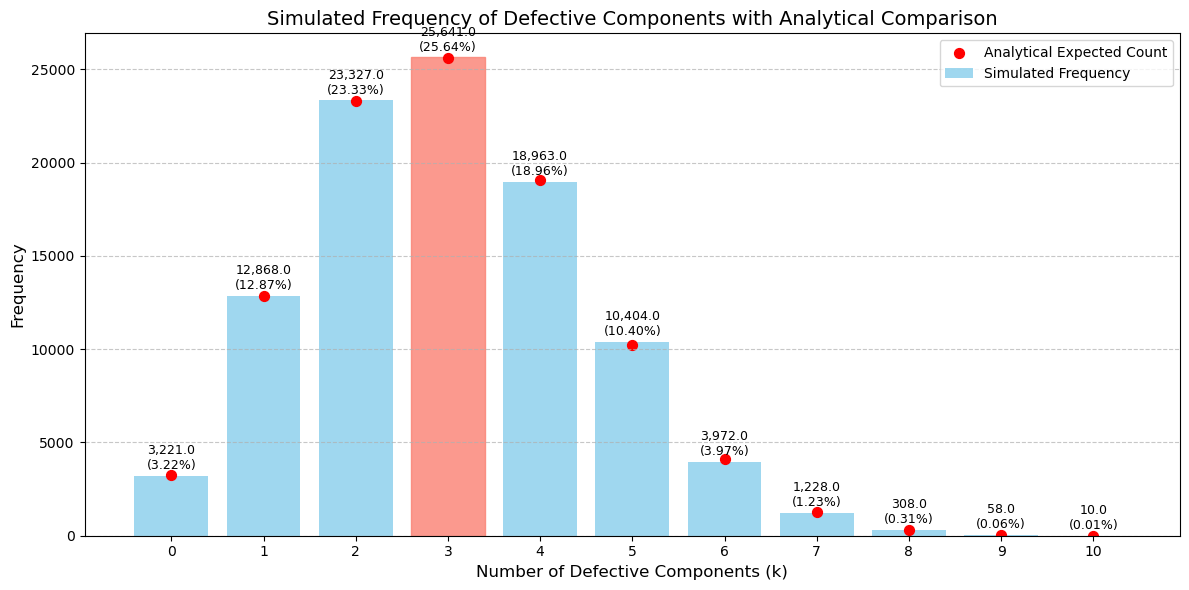

Most frequent outcome (mode) from simulation: 3 defective components
Simulated count: 25,641 occurrences
Analytical expected count: 25,588 occurrences


In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import random
from collections import Counter
import math

# -----------------------------
# Parameters
# -----------------------------
N = 200           # Total batch size
K = 20            # Defective components
n = 30            # Sample size
NUM_SIMULATIONS = 100_000  # Number of simulations

# -----------------------------
# Simulation
# -----------------------------
population = ['D']*K + ['N']*(N-K)
results = [len([x for x in random.sample(population, n) if x=='D']) for _ in range(NUM_SIMULATIONS)]
distribution_counts = Counter(results)

# -----------------------------
# DataFrame for plotting
# -----------------------------
df_analysis = pd.DataFrame(list(distribution_counts.items()), 
                           columns=['Number of Defective Components', 'Frequency'])
df_analysis['Simulated Likelihood (%)'] = df_analysis['Frequency']/NUM_SIMULATIONS*100
df_analysis.sort_values('Number of Defective Components', inplace=True)
df_analysis.reset_index(drop=True, inplace=True)

# -----------------------------
# Analytical expected counts for comparison
# -----------------------------
def favorable_outcomes(k):
    return math.comb(K, k) * math.comb(N-K, n-k)

total_outcomes = math.comb(N, n)
analytical_expected_counts = [favorable_outcomes(k)/total_outcomes * NUM_SIMULATIONS 
                              for k in df_analysis['Number of Defective Components']]

# -----------------------------
# Identify the mode
# -----------------------------
mode_k = max(distribution_counts, key=distribution_counts.get)
mode_freq = distribution_counts[mode_k]
mode_expected_count = favorable_outcomes(mode_k)/total_outcomes * NUM_SIMULATIONS

# -----------------------------
# Bar Chart
# -----------------------------
plt.figure(figsize=(12,6))
bars = plt.bar(df_analysis['Number of Defective Components'], df_analysis['Frequency'], 
               color='skyblue', alpha=0.8, label='Simulated Frequency')

# Highlight mode
bars[df_analysis['Number of Defective Components'].tolist().index(mode_k)].set_color('salmon')

# Overlay analytical expected count as red dots
plt.scatter(df_analysis['Number of Defective Components'], analytical_expected_counts, 
            color='red', marker='o', s=50, label='Analytical Expected Count')

# Annotate each bar with count and likelihood
for idx, row in df_analysis.iterrows():
    plt.text(row['Number of Defective Components'], row['Frequency'] + NUM_SIMULATIONS*0.002,
             f"{row['Frequency']:,}\n({row['Simulated Likelihood (%)']:.2f}%)",
             ha='center', va='bottom', fontsize=9)

plt.xlabel('Number of Defective Components (k)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Simulated Frequency of Defective Components with Analytical Comparison', fontsize=14)
plt.xticks(df_analysis['Number of Defective Components'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------------
# Interpretation
# -----------------------------
print(f"Most frequent outcome (mode) from simulation: {mode_k} defective components")
print(f"Simulated count: {mode_freq:,} occurrences")
print(f"Analytical expected count: {mode_expected_count:,.0f} occurrences")


# Statement on the use of AI

In this section disclose your use of AI. 

Make sure to include:
- **name of AI tool** you used (Gemini, chatGPT, Perplexity, Grok, etc)
- The **prompt(s)** used (if you have used several prompts, just give the most important ones here)
- Explain whether you used the the output of AI **directly** or **after modification**

Please note that while using AI for brainstorming, enhancing your work, or fixing bugs is permitted, a blunt use of AI to solve the entire problem is **prohibited**.

<span style="color: red;">(COMPLETE THIS CELL)</span>

I did not use any AI tools (such as ChatGPT, Gemini, Perplexity, Grok, or similar) in completing this assignment. All analyses, coding, simulations, visualizations, and interpretations were done entirely by me without AI assistance.